<a href="https://colab.research.google.com/github/DSKashif/ML-Projects/blob/main/Kashif_ML_Project_Person_is_Criminal_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<a name = Section1></a>
# ** Problem Statement**
---
- Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". 

- Given the dataset containing __personal details of citizens__.

- A few of them have been arrested for various small and large crimes in the past.

- Make a model to predict whether people will commit crime in future or not using random forest algorithm.  

 

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/crime.jpg" width="500" height="300" /></center>

## Installing and Importing Libraries

In [2]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 6.2 MB/s 


In [13]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
                         # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


# Data Aquisition and Description

In [5]:
crime = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/criminal_train.csv')
crime.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2,0


## Data Information and Statistics

In [7]:
crime.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERID      45718 non-null  int64  
 1   IFATHER    45718 non-null  int64  
 2   NRCH17_2   45718 non-null  int64  
 3   IRHHSIZ2   45718 non-null  int64  
 4   IIHHSIZ2   45718 non-null  int64  
 5   IRKI17_2   45718 non-null  int64  
 6   IIKI17_2   45718 non-null  int64  
 7   IRHH65_2   45718 non-null  int64  
 8   IIHH65_2   45718 non-null  int64  
 9   PRXRETRY   45718 non-null  int64  
 10  PRXYDATA   45718 non-null  int64  
 11  MEDICARE   45718 non-null  int64  
 12  CAIDCHIP   45718 non-null  int64  
 13  CHAMPUS    45718 non-null  int64  
 14  PRVHLTIN   45718 non-null  int64  
 15  GRPHLTIN   45718 non-null  int64  
 16  HLTINNOS   45718 non-null  int64  
 17  HLCNOTYR   45718 non-null  int64  
 18  HLCNOTMO   45718 non-null  int64  
 19  HLCLAST    45718 non-null  int64  
 20  HLLOSR

Remarks
1. There are no null values
2. All data seems to have correct value

# Data Statistics

In [8]:
crime.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000
mean,54454463.79260,3.35555,0.47649,3.42637,1.00171,2.08412,1.00744,1.16261,1.01102,97.39494,70.87410,2.37145,2.65208,2.22448,2.04320,39.55208,86.07395,12.84781,92.27289,89.32335,91.31819,97.10243,97.13688,97.14880,97.13207,97.13721,1.77247,1.01907,1.91673,1.00971,1.96179,1.00556,1.38746,1.01400,85.76016,7.88105,97.97657,97.97657,1.97150,1.10392,1.01846,1.85505,1.74117,1.14482,1.83794,1.01877,1.93160,1.01890,1.80003,1.00993,1.97321,1.01479,1.96384,1.01124,94.12689,8.52474,2.58465,4.75047,1.06142,1.19402,1.76268,2.33814,2.21941,2.23494,1.64614,1.76467,1.97894,1.97874,4692.66118,40023.73912,1.49385,0.06945
std,25539107.56901,1.17665,0.88847,1.42742,0.06131,1.10299,0.12316,0.46903,0.14644,12.35516,44.32568,6.48992,8.94829,4.94478,7.80935,47.78638,33.00842,30.64631,24.25711,28.85306,25.80548,13.29394,13.04907,12.96324,13.08355,13.04672,0.41955,0.19528,0.27677,0.14028,0.19239,0.10692,0.48745,0.16779,33.34899,2.75487,1.51013,1.51013,8.98880,0.30559,0.19218,0.35243,4.07144,3.42148,0.36886,0.19373,0.25295,0.19440,0.40031,0.14182,0.16230,0.17235,0.18738,0.15070,20.47277,1.85901,1.98580,2.10673,0.34557,0.59224,0.42576,0.84973,5.29578,5.29365,0.61840,0.77141,0.14451,0.14516,5724.65949,265.14043,0.50023,0.25422
min,10002216.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000
25%,32331888.50000,4.00000,0.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,99.00000,1.00000,2.00000,2.00000,2.00000,1.00000,1.00000,99.00000,2.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,1.00000,1.00000,99.00000,9.00000,98.00000,98.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,99.00000,9.00000,1.00000,3.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1252.39647,40013.00000,1.00000,0.00000
50%,54110427.0000

Remarks
1. There are max 4 fathers in a house hold
2. Almost every family has children above 18 years
3. Each column has minimum value of -1, which does not make any sense

# Data Pre-Processing

First quick analysis using Pandas profile function

!pip install -q --upgrade pandas-profiling

1. from pandas_profiling import ProfileReport

2. profile = ProfileReport(df = crime)
3. profile.to_file(output_file = 'Pre Profiling Report.html')
4. print('Accomplished!')

# Data Preperation

Preparing x and y using Pandas

In [15]:
x = crime.drop('Criminal', axis = 1)
x.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2


In [16]:
y =crime['Criminal']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Criminal, dtype: int64

Splitting x and y in train and test data set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [18]:
print(x_train.shape)
print(y_train.shape)

(34288, 71)
(34288,)


In [19]:
print(x_test.shape)
print(y_test.shape)

(11430, 71)
(11430,)


# Model Development and Evaluation

Here we will develop Random Forest and tune model if required

For evaluation purpose we will focus on Precision score, Also we will check for Accuracy, Recall, F1-Score, Roc-Auc-Curve and Precision-Recall Curve.

**Random Forest - Baseline Model**

In [21]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

**Now,we are using Trained Model for prediction**


In [22]:
#predicting on test data
y_pred_test = model.predict(x_test)

**Random Forest Model Evaluation**



Checking Accuracy

In [23]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9487314085739282


Checking Precision Score

In [24]:
precision_score(y_test,y_pred_test)

0.6719242902208202

In [25]:
recall_score(y_test,y_pred_test)

0.5298507462686567

Checking F1 Score

In [26]:
f1_score(y_test,y_pred_test)

0.592489568845619

**(As it is not a balance data, checking curve is not recommended)**
Checking ROC-AUC Curve and Precision-Recall Curve



If model is performing good on imbalanced data, then we shour use **precision-recall curve**


Text(0.5, 0, 'Recall')

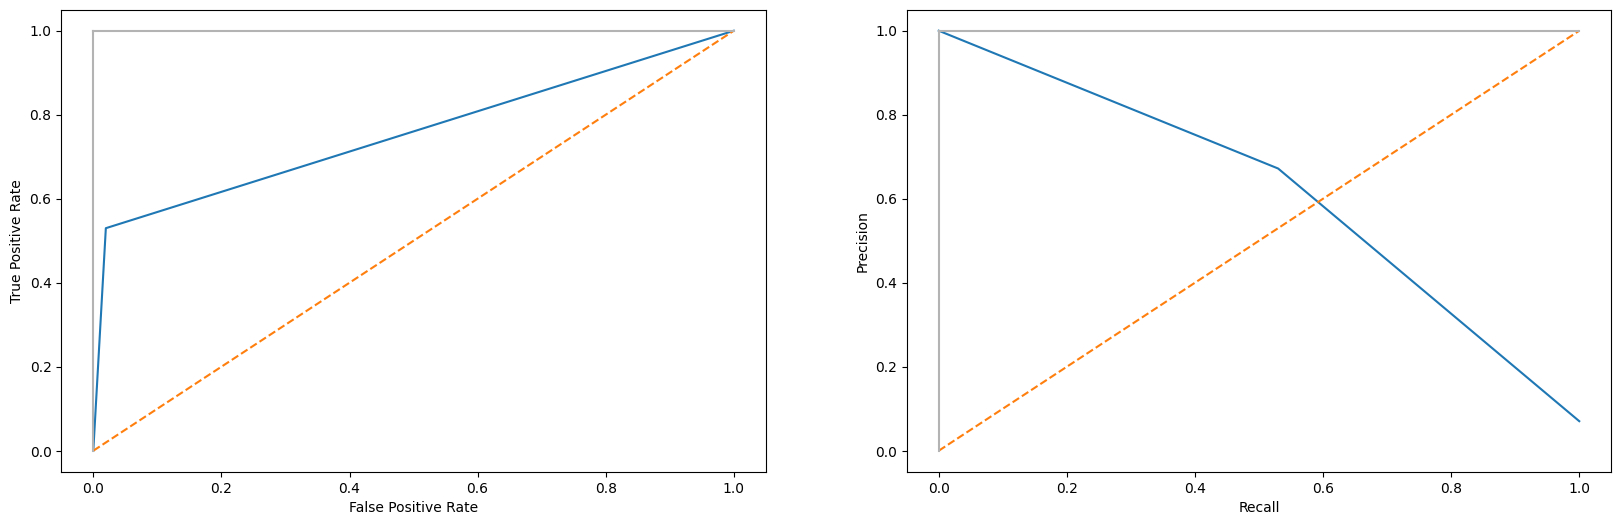

In [27]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

Now we have observed below deference

1.   ROC curver and Precision recall curve are different as data is imbalanced
2.   As precision value is only 67%, we have to do some corrections

Now we will do customoised validation



<a name = Section74></a>

## **Random Forest with RandomizedSearchCV**


Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [28]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [29]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [3, 5, 7, 11],
                                        'min_samples_split': [2, 4, 7, 9],
                                        'n_estimators': [12, 90, 100, 300,
                                                         700]})

In [30]:
y_pred_test1 = random_search.predict(x_test)

## Random Forest with RandomSearchCV Model Evaluation

Check Accuracy Score

In [31]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.9508311461067367


Check Precision Score

In [32]:
precision_score(y_test,y_pred_test1)

0.6908517350157729

Check Recall Score

In [33]:
recall_score(y_test,y_pred_test1)

0.5447761194029851

Check F1 score

In [34]:
f1_score(y_test,y_pred_test1)

0.6091794158553547

# Checking ROC-AUC Curve and Precision-Recall Curve

Text(0.5, 0, 'Recall')

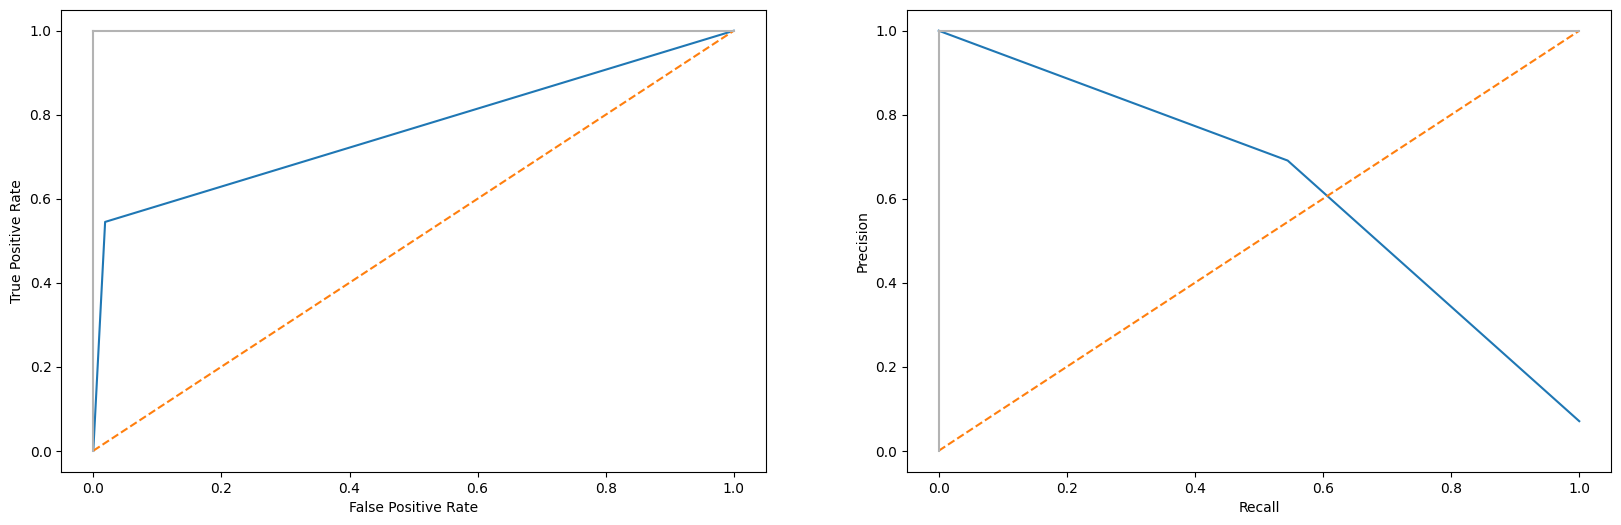

In [35]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

## Choosing Better Model Based On Prediction

In [36]:
precision_dict = {'Baseline Model':precision_score(y_test, y_pred_test),
                  'Tuned Model':precision_score(y_test, y_pred_test1)}

In [37]:
precision = pd.DataFrame(precision_dict, index=['Scores'])

In [40]:
precision

,Baseline Model,Tuned Model
Scores,0.67192,0.69085


We have compared the performance of the two models using various model evaluation techinques.

Our objective is to minimize False Positive so that no innocent is convicted as guilty. Therefore, among recall & precision scores, we will give more importance to precision score.

Precision score for model1 is: 0.67

Precision score for model2 is: 0.69

As precision score of Tuned Model is greater than that of Baseline Model, therefore, Tuned Model is preferable.

## Conclusion
We studied in breifly about the data, its characteristics and its distribution.

We investigated in depth about the features which to retain and which to discard.

We performed model training.

We observed metrics for our prediction.

This model now can help us in identifying the criminal.